In [1]:
%matplotlib inline
import os
import sys

import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

import rtmtools.lblrtm.visualisation as viz

from IPython import display

In [2]:
dir_run = os.path.join('/nuwa_cluster/home/jackyu',
                       'radiation/crd/LW/examples',
                       'separate_g_groups',
                       'study__lblnew_g1_threshold',
                       'P_50_T_250',
                       '3.7268715e-21')
                       
path_dgdgs = os.path.join(dir_run, 'dgdgs.dat')
path_absmean = os.path.join(dir_run, 'absmean.dat')
path_fluxg = os.path.join(dir_run, 'output_fluxg.dat')
path_coolrg = os.path.join(dir_run, 'output_coolrg.dat')
path_flux = os.path.join(dir_run, 'output_flux.dat')
path_coolr = os.path.join(dir_run, 'output_coolr.dat')
                       

In [3]:
dir_clirad = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/clirad/LW/examples',
                          '1_0912_mdc_Steve_CLIRAD_lw',
                          'g1_threshold',
                          'P_50_T_250',
                          '3.7268715e-21',
                          'dgs')

path_coolr_k1 = os.path.join(dir_clirad, 'b07_coolr_k1.txt')
path_coolr_k2 = os.path.join(dir_clirad, 'b07_coolr_k2.txt')
path_coolr_k3 = os.path.join(dir_clirad, 'b07_coolr_k3.txt')
path_coolr_k4 = os.path.join(dir_clirad, 'b07_coolr_k4.txt')

path_sfd_k1 = os.path.join(dir_clirad, 'b07_sfd_k1.txt')
path_sfd_k2 = os.path.join(dir_clirad, 'b07_sfd_k2.txt')
path_sfd_k3 = os.path.join(dir_clirad, 'b07_sfd_k3.txt')
path_sfd_k4 = os.path.join(dir_clirad, 'b07_sfd_k4.txt')

path_sfu_k1 = os.path.join(dir_clirad, 'b07_sfu_k1.txt')
path_sfu_k2 = os.path.join(dir_clirad, 'b07_sfu_k2.txt')
path_sfu_k3 = os.path.join(dir_clirad, 'b07_sfu_k3.txt')
path_sfu_k4 = os.path.join(dir_clirad, 'b07_sfu_k4.txt')

path_fnet_k1 = os.path.join(dir_clirad, 'b07_fnet_k1.txt')
path_fnet_k2 = os.path.join(dir_clirad, 'b07_fnet_k2.txt')
path_fnet_k3 = os.path.join(dir_clirad, 'b07_fnet_k3.txt')
path_fnet_k4 = os.path.join(dir_clirad, 'b07_fnet_k4.txt')

In [4]:
# load fluxg
df = pd.read_csv(path_fluxg, sep=r'\s+')
df = df.set_index(['pressure', 'g'])

ds = xr.Dataset.from_dataframe(df)
ds_fluxg = ds.set_coords(['level'])

In [5]:
# load coolrg
df = pd.read_csv(path_coolrg, sep=r'\s+')
df = df.set_index(['pressure', 'g'])

ds = xr.Dataset.from_dataframe(df)
ds_coolrg = ds.set_coords(['layer'])

In [6]:
# load flux
df = pd.read_csv(path_flux, sep=r'\s+')
df = df.set_index(['pressure'])

ds = xr.Dataset.from_dataframe(df)
ds_flux = ds.set_coords(['level'])

In [7]:
# load coolr
df = pd.read_csv(path_coolr, sep=r'\s+')
df = df.set_index(['pressure'])

ds = xr.Dataset.from_dataframe(df)
ds_coolr = ds.set_coords(['layer'])

In [8]:
# load absmean
df = pd.read_csv(path_absmean, sep=r'\s+')
df = df.set_index(['pressure', 'g'])

ds = xr.Dataset.from_dataframe(df)
ds_absmean = ds.set_coords(['layer'])

In [9]:
# load dgdgs
df = pd.read_csv(path_dgdgs, sep=r'\s+')
df = df.set_index(['g'])

ds_dgdgs = xr.Dataset.from_dataframe(df)

In [20]:
# load clirad's fluxg
paths_flug = [path_sfu_k1, path_sfu_k2, path_sfu_k3, path_sfu_k4]
paths_fldg = [path_sfd_k1, path_sfd_k2, path_sfd_k3, path_sfd_k4]
paths_fnetg = [path_fnet_k1, path_fnet_k2, path_fnet_k3, path_fnet_k4]

df_flug = pd.concat([pd.read_csv(path, header=None)
                     for path in paths_flug], axis=1)
df_fldg = pd.concat([pd.read_csv(path, header=None)
                     for path in paths_fldg], axis=1)
df_fnetg = pd.concat([pd.read_csv(path, header=None)
                      for path in paths_fnetg], axis=1)

ds = xr.Dataset()
ds.coords['pressure'] = ('pressure', ds_fluxg.coords['pressure'])
ds.coords['g'] = ('g', ds_fluxg.coords['g'])
ds.coords['level'] = ('pressure', range(1, ds_fluxg.dims['pressure'] + 1))
ds['flug'] = (('pressure', 'g'), df_flug)
ds['fldg'] = (('pressure', 'g'), df_fldg)
ds['fnetg'] = (('pressure', 'g'), df_fnetg)

ds_fluxg_clirad = ds

In [21]:
# load clirad's coolrg
paths_coolrg = [path_coolr_k1, 
                path_coolr_k2, 
                path_coolr_k3, 
                path_coolr_k4]

df_coolrg = pd.concat([pd.read_csv(path, header=None) 
                       for path in paths_coolrg], axis=1)

ds = xr.Dataset()
ds.coords['pressure'] = ('pressure', ds_coolrg.coords['pressure'])
ds.coords['g'] = ('g', ds_coolrg.coords['g'])
ds.coords['layer'] = ('pressure', 
                      range(1, ds_coolrg.dims['pressure'] + 1))
ds['coolrg'] = (('pressure', 'g'), df_coolrg)

ds_coolrg_clirad = ds

In [10]:
# write out absmean into CLIRAD-compatible input files
for g in ds_absmean.coords['g']:
    if g == 1:
        ds_absmean['absmean'].sel(g=g).to_pandas()\
        .to_csv('group{g:d}_mean{g:d}k.txt'.format(g=int(g)), 
                sep=' ', index=None)
    else:
        ds_absmean['absmeanlog'].sel(g=g).to_pandas()\
        .to_csv('group{g:d}_mean{g:d}k.txt'.format(g=int(g)), 
                sep=' ', index=None)

In [11]:
print()
print('dgs')

ds_dgdgs['dgs'].to_dataframe()


dgs


,dgs
g,
1,0.665366
2,0.232255
3,0.073957
4,0.028422


In [22]:
g = 1

print()
print()
print('crd')
print(ds_fluxg.sel(g=g).isel(pressure=[0, 75]).to_dataframe())
print()
print('clirad')
print(ds_fluxg_clirad.sel(g=g).isel(pressure=[0, 75]).to_dataframe())
print()
print('clirad - crd')
print(ds_fluxg_clirad\
 .sel(g=g).isel(pressure=[0, 75])\
 .to_dataframe().set_index(['g', 'level'], append=True)
 - ds_fluxg\
 .sel(g=g).isel(pressure=[0, 75])\
 .to_dataframe().set_index(['g', 'level'], append=True))



crd
          g  level       flug      fldg      fnetg
pressure                                          
0         1      1 -15.571230  0.000000 -15.571230
1013      1     76 -15.852532  0.539918 -15.312614

clirad
          g  level      flug    fldg     fnetg
pressure                                      
0         1      1 -15.49630  0.0000 -15.49630
1013      1     76 -15.79619  0.5898 -15.20639

clirad - crd
                      flug      fldg     fnetg
pressure g level                              
0        1 1      0.074930  0.000000  0.074930
1013     1 76     0.056342  0.049882  0.106224


In [23]:
g = 2

print()
print()
print('crd')
print(ds_fluxg.sel(g=g).isel(pressure=[0, 75]).to_dataframe())
print()
print('clirad')
print(ds_fluxg_clirad.sel(g=g).isel(pressure=[0, 75]).to_dataframe())
print()
print('clirad - crd')
print(ds_fluxg_clirad\
 .sel(g=g).isel(pressure=[0, 75])\
 .to_dataframe().set_index(['g', 'level'], append=True)
 - ds_fluxg\
 .sel(g=g).isel(pressure=[0, 75])\
 .to_dataframe().set_index(['g', 'level'], append=True))



crd
          g  level      flug      fldg     fnetg
pressure                                        
0         2      1 -4.312402  0.000000 -4.312402
1013      2     76 -5.482706  1.779299 -3.703407

clirad
          g  level     flug     fldg    fnetg
pressure                                     
0         2      1 -4.53404  0.00000 -4.53404
1013      2     76 -5.51387  1.55278 -3.96109

clirad - crd
                      flug      fldg     fnetg
pressure g level                              
0        2 1     -0.221638  0.000000 -0.221638
1013     2 76    -0.031164 -0.226519 -0.257683


In [24]:
g = 3

print()
print()
print('crd')
print(ds_fluxg.sel(g=g).isel(pressure=[0, 75]).to_dataframe())
print()
print('clirad')
print(ds_fluxg_clirad.sel(g=g).isel(pressure=[0, 75]).to_dataframe())
print()
print('clirad - crd')
print(ds_fluxg_clirad\
 .sel(g=g).isel(pressure=[0, 75])\
 .to_dataframe().set_index(['g', 'level'], append=True)
 - ds_fluxg\
 .sel(g=g).isel(pressure=[0, 75])\
 .to_dataframe().set_index(['g', 'level'], append=True))



crd
          g  level      flug      fldg     fnetg
pressure                                        
0         3      1 -0.826894  0.000000 -0.826894
1013      3     76 -1.748140  1.058796 -0.689344

clirad
          g  level     flug     fldg    fnetg
pressure                                     
0         3      1 -0.82847  0.00000 -0.82847
1013      3     76 -1.75578  1.08012 -0.67567

clirad - crd
                      flug      fldg     fnetg
pressure g level                              
0        3 1     -0.001576  0.000000 -0.001576
1013     3 76    -0.007640  0.021324  0.013674


In [25]:
g = 4

print()
print()
print('crd')
print(ds_fluxg.sel(g=g).isel(pressure=[0, 75]).to_dataframe())
print()
print('clirad')
print(ds_fluxg_clirad.sel(g=g).isel(pressure=[0, 75]).to_dataframe())
print()
print('clirad - crd')
print(ds_fluxg_clirad\
 .sel(g=g).isel(pressure=[0, 75])\
 .to_dataframe().set_index(['g', 'level'], append=True)
 - ds_fluxg\
 .sel(g=g).isel(pressure=[0, 75])\
 .to_dataframe().set_index(['g', 'level'], append=True))



crd
          g  level      flug      fldg     fnetg
pressure                                        
0         4      1 -0.160521  0.000000 -0.160521
1013      4     76 -0.671793  0.508478 -0.163315

clirad
          g  level     flug     fldg    fnetg
pressure                                     
0         4      1 -0.09905  0.00000 -0.09905
1013      4     76 -0.67476  0.53662 -0.13814

clirad - crd
                      flug      fldg     fnetg
pressure g level                              
0        4 1      0.061471  0.000000  0.061471
1013     4 76    -0.002967  0.028142  0.025175


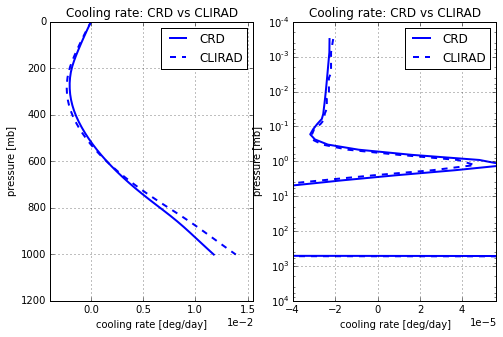

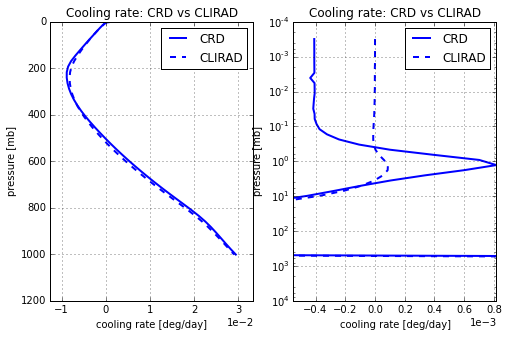

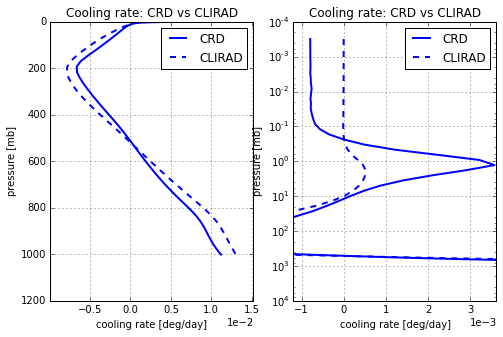

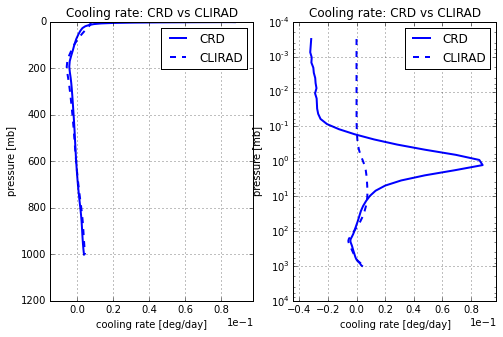

In [26]:
for g in ds_coolrg.coords['g']:
    srs_crd = ds_coolrg['coolrg'].sel(g=g).to_pandas()
    srs_clirad = ds_coolrg_clirad['coolrg'].sel(g=g).to_pandas()
    
    srss = [srs_crd, srs_clirad]
    names = ['CRD', 'CLIRAD']
    colours = ['b', 'b']
    linestyles = ['-', '--']
    
    xlabel = 'cooling rate [deg/day]'
    ylabel = 'pressure [mb]'
    title = 'Cooling rate: CRD vs CLIRAD'
    
    fig = viz.plot_pdseries_indexVSvalues_linearlog(srss=srss,
                                                    names=names,
                                                    colours=colours,
                                                    linestyles=linestyles,
                                                    xlabel=xlabel,
                                                    ylabel=ylabel,
                                                    title=title)

In [27]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')